In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

## Spatial Disparity

In [2]:
# Audio bias of HC
HC_bias_a = np.zeros((3, 8))
# HC_bias_a[0]--High; HC_bias_a[1]--Medium; HC_bias_a[2]--Low
HC_bias_a[0] = np.array(
    [
        -5.21640112246667,
        -4.18706601266667,
        -3.13696911613333,
        -2.09924748133333,
        1.35796414540000,
        3.07563797893333,
        3.81842299133333,
        3.35914483333333,
    ]
)
HC_bias_a[1] = np.array(
    [
        -4.65343309471429,
        -5.46053503785714,
        -2.09086371792857,
        -1.13832656671429,
        -0.277120626642857,
        0.262638716714286,
        2.19984634542857,
        3.40839929092857,
    ]
)
HC_bias_a[2] = np.array(
    [
        -2.93714767620000,
        -2.81604437300000,
        -1.61590862560000,
        -1.98143368426667,
        -1.29873315480000,
        0.0165255805333333,
        0.501353158466667,
        1.16135676946667,
    ]
)

In [3]:
# Causal Inference of HC
HC_pro_com = np.array(
    [
        [
            0.367025484375000,
            0.682562911541667,
            0.822405755208334,
            0.876760716875000,
            0.863113007208333,
            0.809197201583333,
            0.649743997500000,
            0.321256356083333,
        ],
        [
            0.435277895916667,
            0.621660267583333,
            0.659722209500000,
            0.704617010791667,
            0.724928494125000,
            0.687408309375000,
            0.612227719333333,
            0.446587043833333,
        ],
        [
            0.519254406291667,
            0.624221809791667,
            0.623241935666667,
            0.633213512666667,
            0.650625944875000,
            0.645931453375000,
            0.608952192000000,
            0.537992153875000,
        ],
    ]
)

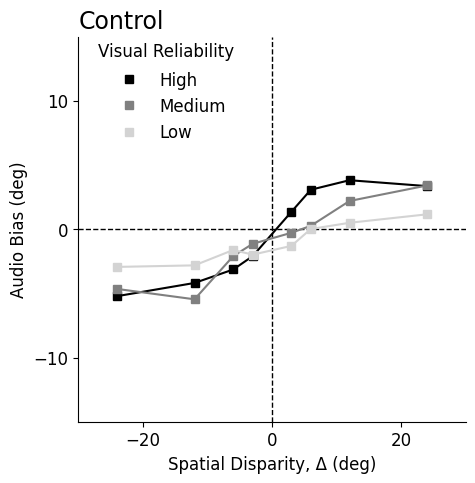

In [4]:
dis = np.array([-24, -12, -6, -3, 3, 6, 12, 24])  # disparities
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.spines[["top", "right"]].set_visible(False)
plt.axvline(0, ls="--", c=colors["black"], linewidth=1.0)
plt.axhline(0, ls="--", c=colors["black"], linewidth=1.0)
plt.plot(dis, HC_bias_a[0], "s", color=colors["black"], label="High")
plt.plot(dis, HC_bias_a[0], color=colors["black"])
plt.plot(dis, HC_bias_a[1], "s", color=colors["grey"], label="Medium")
plt.plot(dis, HC_bias_a[1], color=colors["grey"])
plt.plot(dis, HC_bias_a[2], "s", color=colors["lightgrey"], label="Low")
plt.plot(dis, HC_bias_a[2], color=colors["lightgrey"])
plt.annotate(
    "Visual Reliability", xy=(0.05, 0.95), xycoords="axes fraction", fontsize=12
)

plt.title("Control", loc="left", color=colors["black"], fontsize=17)
plt.xlabel("Spatial Disparity, Δ (deg)", fontsize=12)
plt.ylabel("Audio Bias (deg)", fontsize=12)
plt.xlim(-30, 30)
plt.ylim(-15, 15)
plt.xticks([-20, 0, 20], fontsize=12)
plt.yticks([-10, 0, 10], fontsize=12)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc="upper left", frameon=False, fontsize=12)
plt.show()

In [11]:
from skneuromsi.sweep import ParameterSweep
from skneuromsi.neural import Cuppini2017
from skneuromsi.neural import Paredes2022
from skneuromsi.mle import AlaisBurr2004
from skneuromsi.bayesian import Kording2007

## SWEEP SETUP
dis = np.array([-24, -12, -6, -3, 3, 6, 12, 24])  # disparities

model_alaisburr = AlaisBurr2004(position_range=(0, 90), position_res=1)
model_kording = Kording2007(position_range=(0, 90), position_res=1)
model_cuppini2017 = Cuppini2017(neurons=90, position_range=(0, 90), position_res=1)
model_paredes = Paredes2022(
    neurons=90, position_range=(0, 90), position_res=1, time_range=(0, 100)
)

sp_alaisburr = ParameterSweep(
    model=model_alaisburr,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

sp_kording = ParameterSweep(
    model=model_kording,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)
sp_paredes = ParameterSweep(
    model=model_paredes,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)

## BIAS
res_alaisburr = sp_alaisburr.run(
    auditory_position=45, auditory_sigma=4.695e01, visual_sigma=4.505e01, noise=False
)

res_kording = sp_kording.run(
    auditory_position=45,
    auditory_sigma=2.490e01,
    visual_sigma=2.171e01,
    prior_mu=4.069e01,
    prior_sigma=5.277e00,
    noise=False,
)

res_cuppini2017 = sp_cuppini2017.run(
    auditory_position=45,
    auditory_sigma=4.511e01,
    visual_sigma=2.495e01,
    auditory_intensity=1.191e01,
    visual_intensity=1.387e01,
    noise=False,
)
res_paredes = sp_paredes.run(
    auditory_position=45,
    auditory_sigma=2.000e01,
    visual_sigma=1.854e01,
    auditory_intensity=1.113e00,
    visual_intensity=7.728e00,
    noise=False,
    auditory_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=100,
    visual_duration=100,
    auditory_onset=0,
    visual_onset=0,
)

## CAUSES
res_kording_causes = sp_kording.run(
    auditory_position=45,
    auditory_sigma=8.042e00,
    visual_sigma=8.041e00,
    noise=False,
    strategy="selection",
    prior_mu=6.898e01,
    prior_sigma=4.501e01,
    causes_kind="prob",
)

res_cuppini2017_causes = sp_cuppini2017.run(
    auditory_position=45,
    auditory_sigma=2.803e01,
    visual_sigma=8.033e00,
    auditory_intensity=1.328e01,
    visual_intensity=2.366e01,
    noise=False,
    causes_kind="prob",
    causes_dim="space",
)

model_paredes = Paredes2022(
    neurons=90, position_range=(0, 90), position_res=1, time_range=(0, 150)
)
sp_paredes = ParameterSweep(
    model=model_paredes,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=45 + dis,
)
res_paredes_causes = sp_paredes.run(
    auditory_position=45,
    auditory_sigma=4.215e01,
    visual_sigma=1.673e01,
    auditory_intensity=2.698e01,
    visual_intensity=4.776e00,
    noise=False,
    causes_kind="prob",
    causes_dim="space",
    auditory_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=150,
    visual_duration=150,
    auditory_onset=0,
    visual_onset=0,
    causes_peak_threshold=0.15,
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Calculating biases:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating biases:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating biases:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating biases:   0%|          | 0/8 [00:00<?, ?it/s]

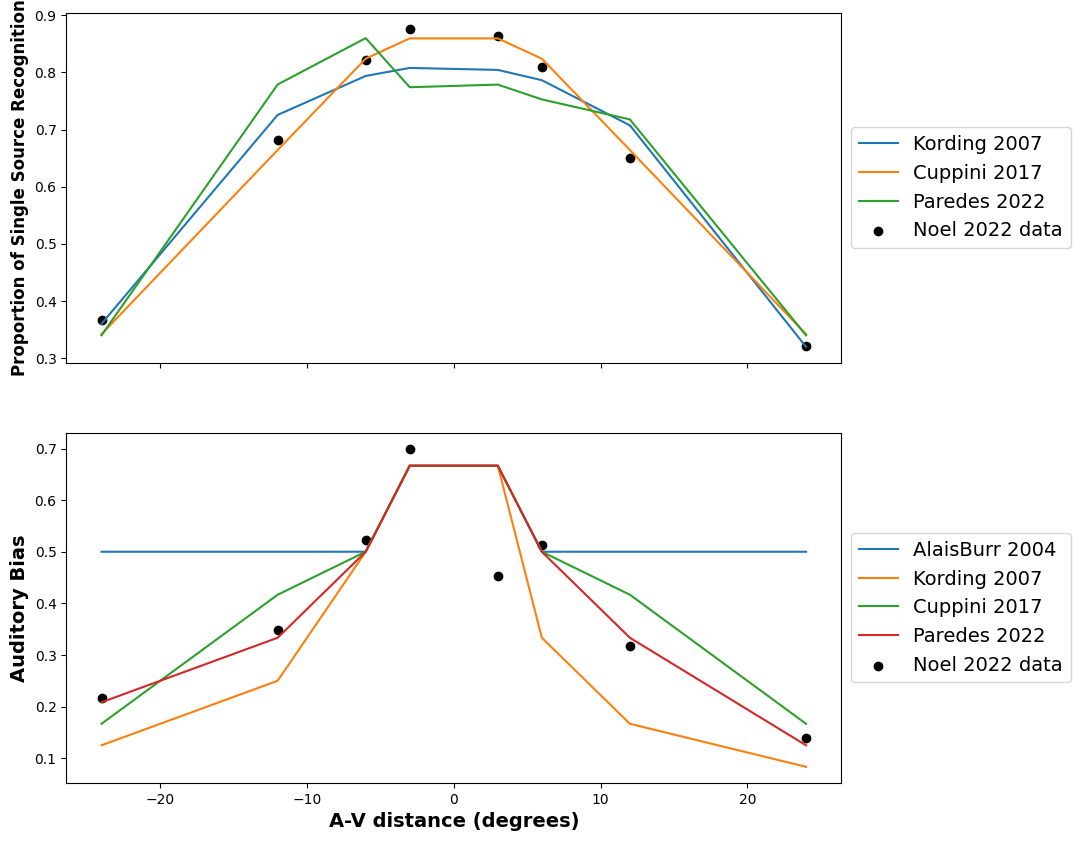

In [12]:
fig, axs = plt.subplots(
    2, 1, figsize=(10, 10), sharex=True
)  # initializes figure and plots
ax1 = plt.subplot(211)

bias_data = np.abs(HC_bias_a[0]) / np.abs(dis)
causes_data = HC_pro_com[0]

ax1.plot(
    dis,
    res_kording_causes.causes.causes_by_parameter(parameter="visual_position")[
        ("", "Causes")
    ].values,
)

ax1.plot(
    dis,
    res_cuppini2017_causes.causes.causes_by_parameter(parameter="visual_position")[
        ("", "Causes")
    ].values,
)

ax1.plot(
    dis,
    res_paredes_causes.causes.causes_by_parameter(parameter="visual_position")[
        ("", "Causes")
    ].values,
)


# ax1.plot(dis, causes_data, "--")
ax1.scatter(dis, causes_data, c="k")
ax1.set_ylabel("Proportion of Single Source Recognition", size=12, weight="bold")
ax1.set_xlabel("A-V distance (degrees)", size=14)
ax1.legend(
    ["Kording 2007", "Cuppini 2017", "Paredes 2022", "Noel 2022 data"],
    fontsize=14,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

ax2 = plt.subplot(212)

res_alaisburr.bias.bias_mean(
    influence_parameter="auditory_position", mode="multi"
).plot(ax=ax2)
res_kording.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax2)
res_cuppini2017.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax2)
res_paredes.bias.bias_mean(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax2)

# Requires to specify mode because cannot distinguish max variance across modes. Maybe link it with influence_parameter?
# ax2.plot(dis, bias_data, "--")
ax2.scatter(dis, bias_data, c="k")
ax2.set_xlabel("A-V distance (degrees)", size=14, weight="bold")
ax2.set_ylabel("Auditory Bias", size=14, weight="bold")
ax2.legend(
    [
        "AlaisBurr 2004",
        "Kording 2007",
        "Cuppini 2017",
        "Paredes 2022",
        "Noel 2022 data",
    ],
    fontsize=14,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

In [122]:
from findpeaks import findpeaks

fp = findpeaks(method="topology", verbose=5, interpolate=15, limit=0.000001)
fp_results = fp.fit(
    res_cuppini2017_causes[5].get_modes("multi").query("times==9999").values.T[0]
)
peaks_df = fp_results["df"].query("peak==True & valley==False")
peaks_df
peaks_df[peaks_df["y"] > 0.15]

[findpeaks] >Finding peaks in 1d-vector using [topology] method..
[findpeaks] >Interpolating 1d-vector by factor 15
[findpeaks] >Detect peaks using topology method with limit at 1e-06.


2694it [00:00, 211723.19it/s]


,y,x,labx,valley,peak,rank,score
51,0.824135,51,52.0,False,True,66,0.07116


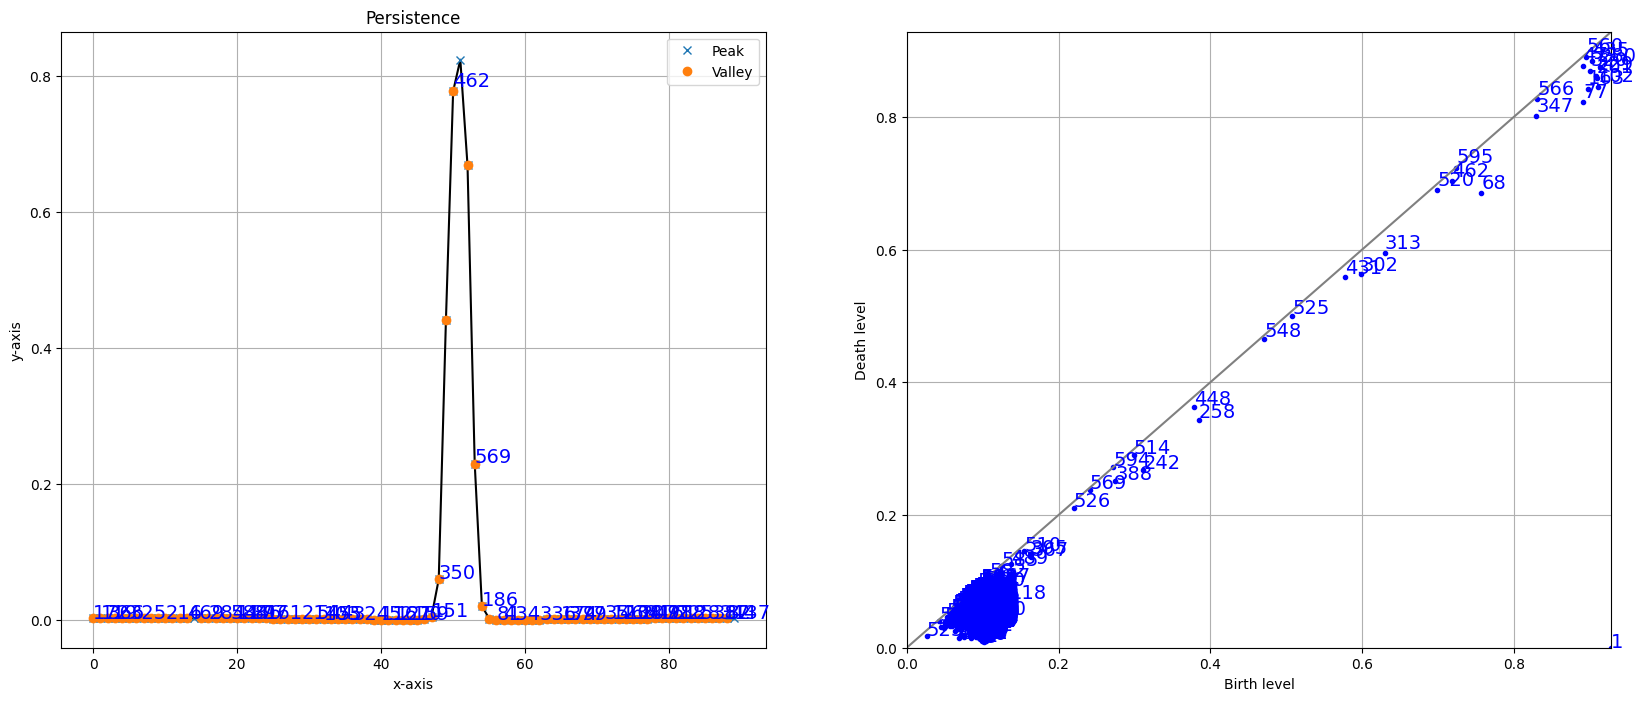

(<Axes: title={'center': 'Persistence'}, xlabel='x-axis', ylabel='y-axis'>,
 <Axes: xlabel='Birth level', ylabel='Death level'>)

In [22]:
fp.plot_persistence()

## PAPER IDEAS

- Option 1: Fit only Experiment 1. Take sd estimates of auditory and visual, and compute the combined situation using Alais and Kording. Try using the same for the Network.
- Option 2: Fit Experiment 2 data. Fit sd parameters to auditory bias data using Alais, Kording and Networks. For Networks it may be necessary to fit other parameters.

I discard Option 1 because unlike Alais and Burr original paper, the unimodal and bimodal measurements are not in the same range. Noel still used unimodal estimates to predict bimodal measurements and achieves a good fit.

Going for Option 2 seems more straightforward for every model. Also resembles Yaru's work, given that she manually fitted those values to reproduce the curves. 

## Temporal Disparity

In [4]:
# Use Cuppini 2017, Paredes 2022

## TEMPORAL DATA

temporal_dis = (
    np.array(
        [
            -0.7,
            -0.5,
            -0.3,
            -0.25,
            -0.2,
            -0.15,
            -0.1,
            -0.08,
            -0.05,
            -0.02,
            -0.01,
            0.0,
            0.01,
            0.02,
            0.05,
            0.08,
            0.1,
            0.15,
            0.2,
            0.25,
            0.3,
            0.5,
            0.7,
        ]
    )
    * 1000
)

temporal_causes_data = np.array(
    [
        0.03154762,
        0.03214286,
        0.07619048,
        0.19699793,
        0.30345238,
        0.50193093,
        0.72754579,
        0.82582418,
        0.90882784,
        0.93468864,
        0.97271062,
        0.97710623,
        0.95398352,
        0.94500916,
        0.94871795,
        0.94787546,
        0.92052078,
        0.87787546,
        0.75857143,
        0.51714286,
        0.33121212,
        0.05779221,
        0.02836439,
    ]
)

In [19]:
from skneuromsi.sweep import ParameterSweep
from skneuromsi.neural import Cuppini2017
from skneuromsi.neural import Paredes2022

temporal_model_cuppini2017 = Cuppini2017(
    neurons=10, position_range=(0, 10), position_res=1, time_range=(0, 1800)
)
temporal_model_paredes = Paredes2022(
    neurons=6, position_range=(0, 6), position_res=1, time_range=(0, 800)
)

temporal_sp_cuppini2017 = ParameterSweep(
    model=temporal_model_cuppini2017,
    target="visual_position",
    repeat=1,
    n_jobs=-2,
    range=900 + temporal_dis,
)

temporal_sp_paredes = ParameterSweep(
    model=temporal_model_paredes,
    target="auditory_onset",
    repeat=1,
    n_jobs=-2,
    range=300 + temporal_dis[3:-2],
)

temporal_res_paredes_causes = temporal_sp_paredes.run(
    noise=False,
    causes_kind="prob",
    causes_dim="time",
    auditory_soa=None,
    visual_soa=None,
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=7,
    visual_duration=7,
    visual_onset=300,
    auditory_intensity=7.276e-01,
    visual_intensity=1.994e00,
    feedforward_weight=8.117e-01,
)

Sweeping 'auditory_onset':   0%|          | 0/18 [00:00<?, ?it/s]

In [5]:
from skneuromsi.neural import Cuppini2017
from skneuromsi.sweep import ParameterSweep

temporal_model_cuppini2017 = Cuppini2017(
    neurons=10,
    position_range=(0, 10),
    position_res=1,
    time_range=(0, 600),
    tau=(3.440e01, 2.887e01, 15),
)

temporal_sp_cuppini2017 = ParameterSweep(
    model=temporal_model_cuppini2017,
    target="auditory_onset",
    repeat=1,
    n_jobs=-2,
    range=275 + temporal_dis[3:-2],
)

temporal_res_cuppini2017_causes = temporal_sp_cuppini2017.run(
    noise=False,
    causes_kind="prob",
    causes_dim="time",
    auditory_stim_n=1,
    visual_stim_n=1,
    auditory_duration=7,
    visual_duration=7,
    visual_onset=275,
    feedforward_weight=7.492e01,
)

Sweeping 'auditory_onset':   0%|          | 0/18 [00:00<?, ?it/s]

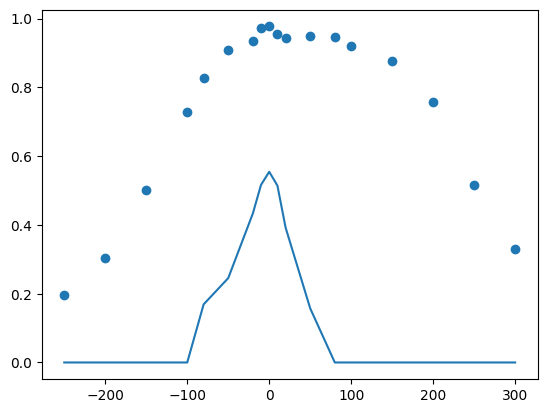

In [7]:
ax1 = plt.subplot(111)
ax1.plot(
    temporal_dis[3:-2],
    temporal_res_cuppini2017_causes.causes.causes_by_parameter(
        parameter="auditory_onset"
    )[("", "Causes")].values,
)
ax1.scatter(temporal_dis[3:-2], temporal_causes_data[3:-2])

<Axes: title={'center': 'Cuppini2017 - Position 5'}, xlabel='times', ylabel='values'>

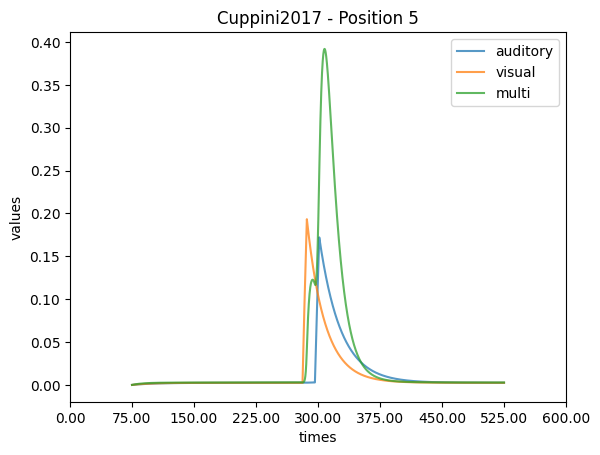

In [8]:
temporal_res_cuppini2017_causes[10].plot.linet()

In [23]:
temporal_res_cuppini2017_causes.causes.causes_by_parameter(parameter="visual_onset")

,Parameters,
,visual_onset,Causes
Iteration,,
0,0,0.152967
1,0,0.154166
2,0,0.159373
3,0,0.182839
4,0,0.208790
5,0,0.299080
6,0,0.513941
7,0,0.608527


NameError: name 'temporal_res_paredes_causes' is not defined

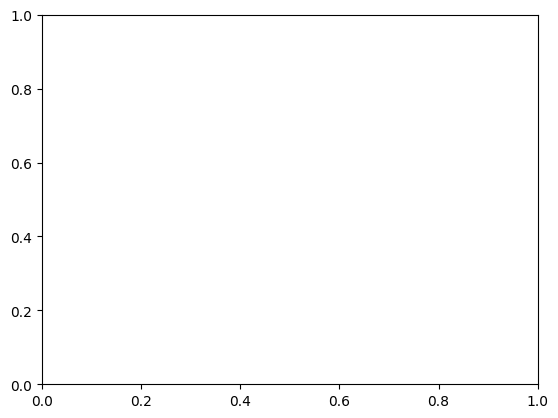

In [26]:
ax1 = plt.subplot(111)
ax1.plot(
    temporal_dis[3:-2],
    temporal_res_paredes_causes.causes.causes_by_parameter(parameter="visual_onset")[
        ("", "Causes")
    ].values,
)
ax1.scatter(temporal_dis[3:-2], temporal_causes_data[3:-2])

In [22]:
temporal_res_paredes_causes.disparity_matrix()

Parameters,auditory_soa,visual_soa,auditory_onset,visual_onset,auditory_duration,visual_duration,auditory_position,visual_position,auditory_intensity,visual_intensity,...,feedforward_weight,auditory_gain,visual_gain,multisensory_gain,auditory_stim_n,visual_stim_n,feedforward_pruning_threshold,cross_modal_pruning_threshold,causes_kind,causes_dim
Iteration,,,,,,,,,,,,,,,,,,,,,
0,None,None,50.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
1,None,None,100.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
2,None,None,150.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
3,None,None,200.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
4,None,None,220.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
5,None,None,250.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
6,None,None,280.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
7,None,None,290.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time
8,None,None,300.0,300,7,7,None,None,0.7276,1.994,...,0.8117,None,None,None,1,1,0,0,prob,time


<Axes: title={'center': 'Paredes2022 - Position 3'}, xlabel='times', ylabel='values'>

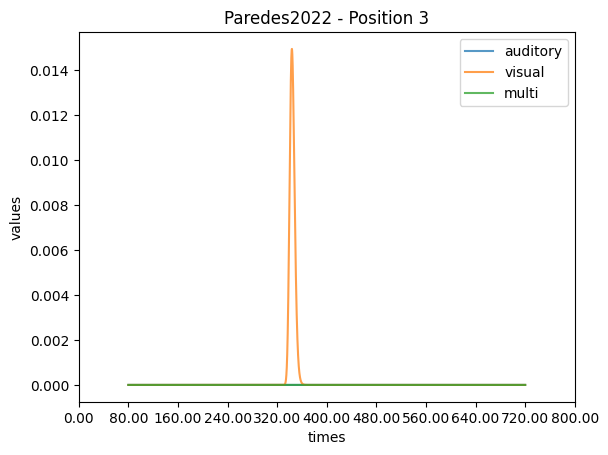

In [23]:
temporal_res_paredes_causes[14].plot.linet()